# EDA Process

---

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

---

### Retrieve Data

In [2]:
df = pd.read_csv(r'Data\Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1210 non-null   int64 
 1   Headline    1210 non-null   object
 2   Posted by   1210 non-null   object
 3   Date        1210 non-null   object
 4   Category    1210 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.4+ KB


In [4]:
df.isna().sum()

Unnamed: 0    0
Headline      0
Posted by     0
Date          0
Category      0
dtype: int64

---

### Data Cleaning

In [93]:
df_clean = df.copy()

In [94]:
df_clean = df_clean.drop(columns='Unnamed: 0')

#### Handling Date

In [95]:
df_clean[['MonthDay', 'Year']] = df_clean['Date'].str.split(',', expand=True)
df_clean[['Month', 'Day']] = df_clean['MonthDay'].str.split(' ', expand=True)
df_clean = df_clean.drop(columns=['MonthDay', 'Date'])

In [96]:
def mtn(x):
    months = {'January': 1, 'February': 2, 'March': 3, 'April':4,
              'May':5, 'June':6, 'July':7, 'August':8,
              'September':9, 'October':10, 'November':11, 'December':12}
    return months[x]

df_clean['Month'] = df_clean['Month'].apply(mtn).astype('str')

In [98]:
df_clean['Date'] = df_clean['Year'] + '-' + df_clean['Month'] + '-' + df_clean['Day']
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

#### Handling Posted By

In [100]:
df_clean['Posted by'] = df_clean['Posted by'].apply(lambda x: x[9:])

#### Normalizing Look of Categories

In [103]:
def cat(x):
    Norm_cat = {
        'data-analytics': 'Data Analytics', 'data-engineering': 'Data Engineering', 'data-visualization': 'Data Visualization',
       'deep-learning': 'Deep Learning', 'generative-ai': 'Generative Ai', 'machine-learning': 'Machine Learning',
       'nlp-text-analytics': 'NLP and LLMs', 'python': 'Python'
    }
    return Norm_cat[x]

df_clean['Category'] = df_clean['Category'].apply(cat)

#### Last But Not Least

In [108]:
df_clean['Day'] = df_clean['Day'].astype('int')
df_clean['Month'] = df_clean['Month'].astype('int')
df_clean['Year'] = df_clean['Year'].astype('int')

df_clean = df_clean[['Headline', 'Date', 'Day', 'Month', 'Year', 'Category', 'Posted by']]

---

### Cleaned Data

In [110]:
df_clean.to_csv(r'Data Cleaned\cleaned_data.csv')

---

## Questions

### 1. What is the most trended category in the website?

In [182]:
cats = df_clean[['Category', 'Headline']].groupby('Category').count()
cats

,Headline
Category,
Data Analytics,20
Data Engineering,40
Data Visualization,130
Deep Learning,230
Generative Ai,60
Machine Learning,350
NLP and LLMs,270
Python,110


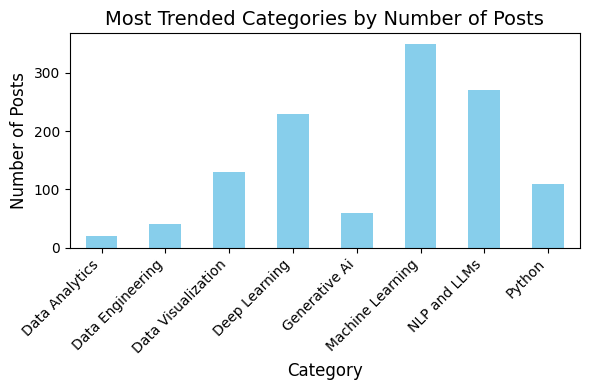

In [141]:
plt.figure(figsize=(6, 4))
cats['Headline'].plot(kind='bar', color='skyblue')

plt.title('Most Trended Categories by Number of Posts', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

---

### 2. Who is the publisher with highest number of posts?

In [143]:
pubs = df_clean[['Posted by', 'Headline']].groupby('Posted by').count()
pubs['Headline'].nlargest(5)

Posted by
ODSC Community             418
ODSC Team                  178
Daniel Gutierrez, ODSC      41
Elizabeth Wallace, ODSC     33
April Miller                26
Name: Headline, dtype: int64

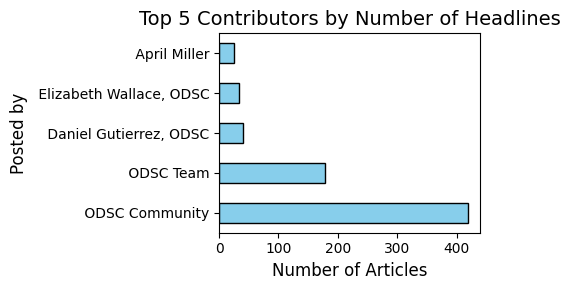

In [146]:
top_pubs = pubs['Headline'].nlargest(5)

plt.figure(figsize=(5, 3))
top_pubs.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Top 5 Contributors by Number of Headlines', fontsize=14)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Posted by', fontsize=12)
plt.tight_layout()

plt.show()

---

### 3. What the best month to flash posts of year?

In [168]:
monthly_posts = df_clean[['Month', 'Headline']].groupby('Month').count()
monthly_posts

,Headline
Month,
1,76
2,105
3,102
4,116
5,102
6,116
7,100
8,117
9,107


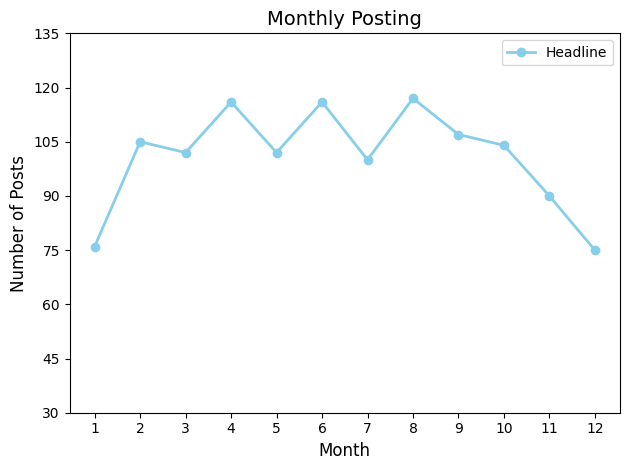

In [166]:
# Assuming your data is already grouped by 'Month' and the count of posts is ready
monthly_posts.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=6)

plt.title('Monthly Posting', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.yticks(range(30, 150, 15))

plt.show()

---

### 4. Years with flashed categories

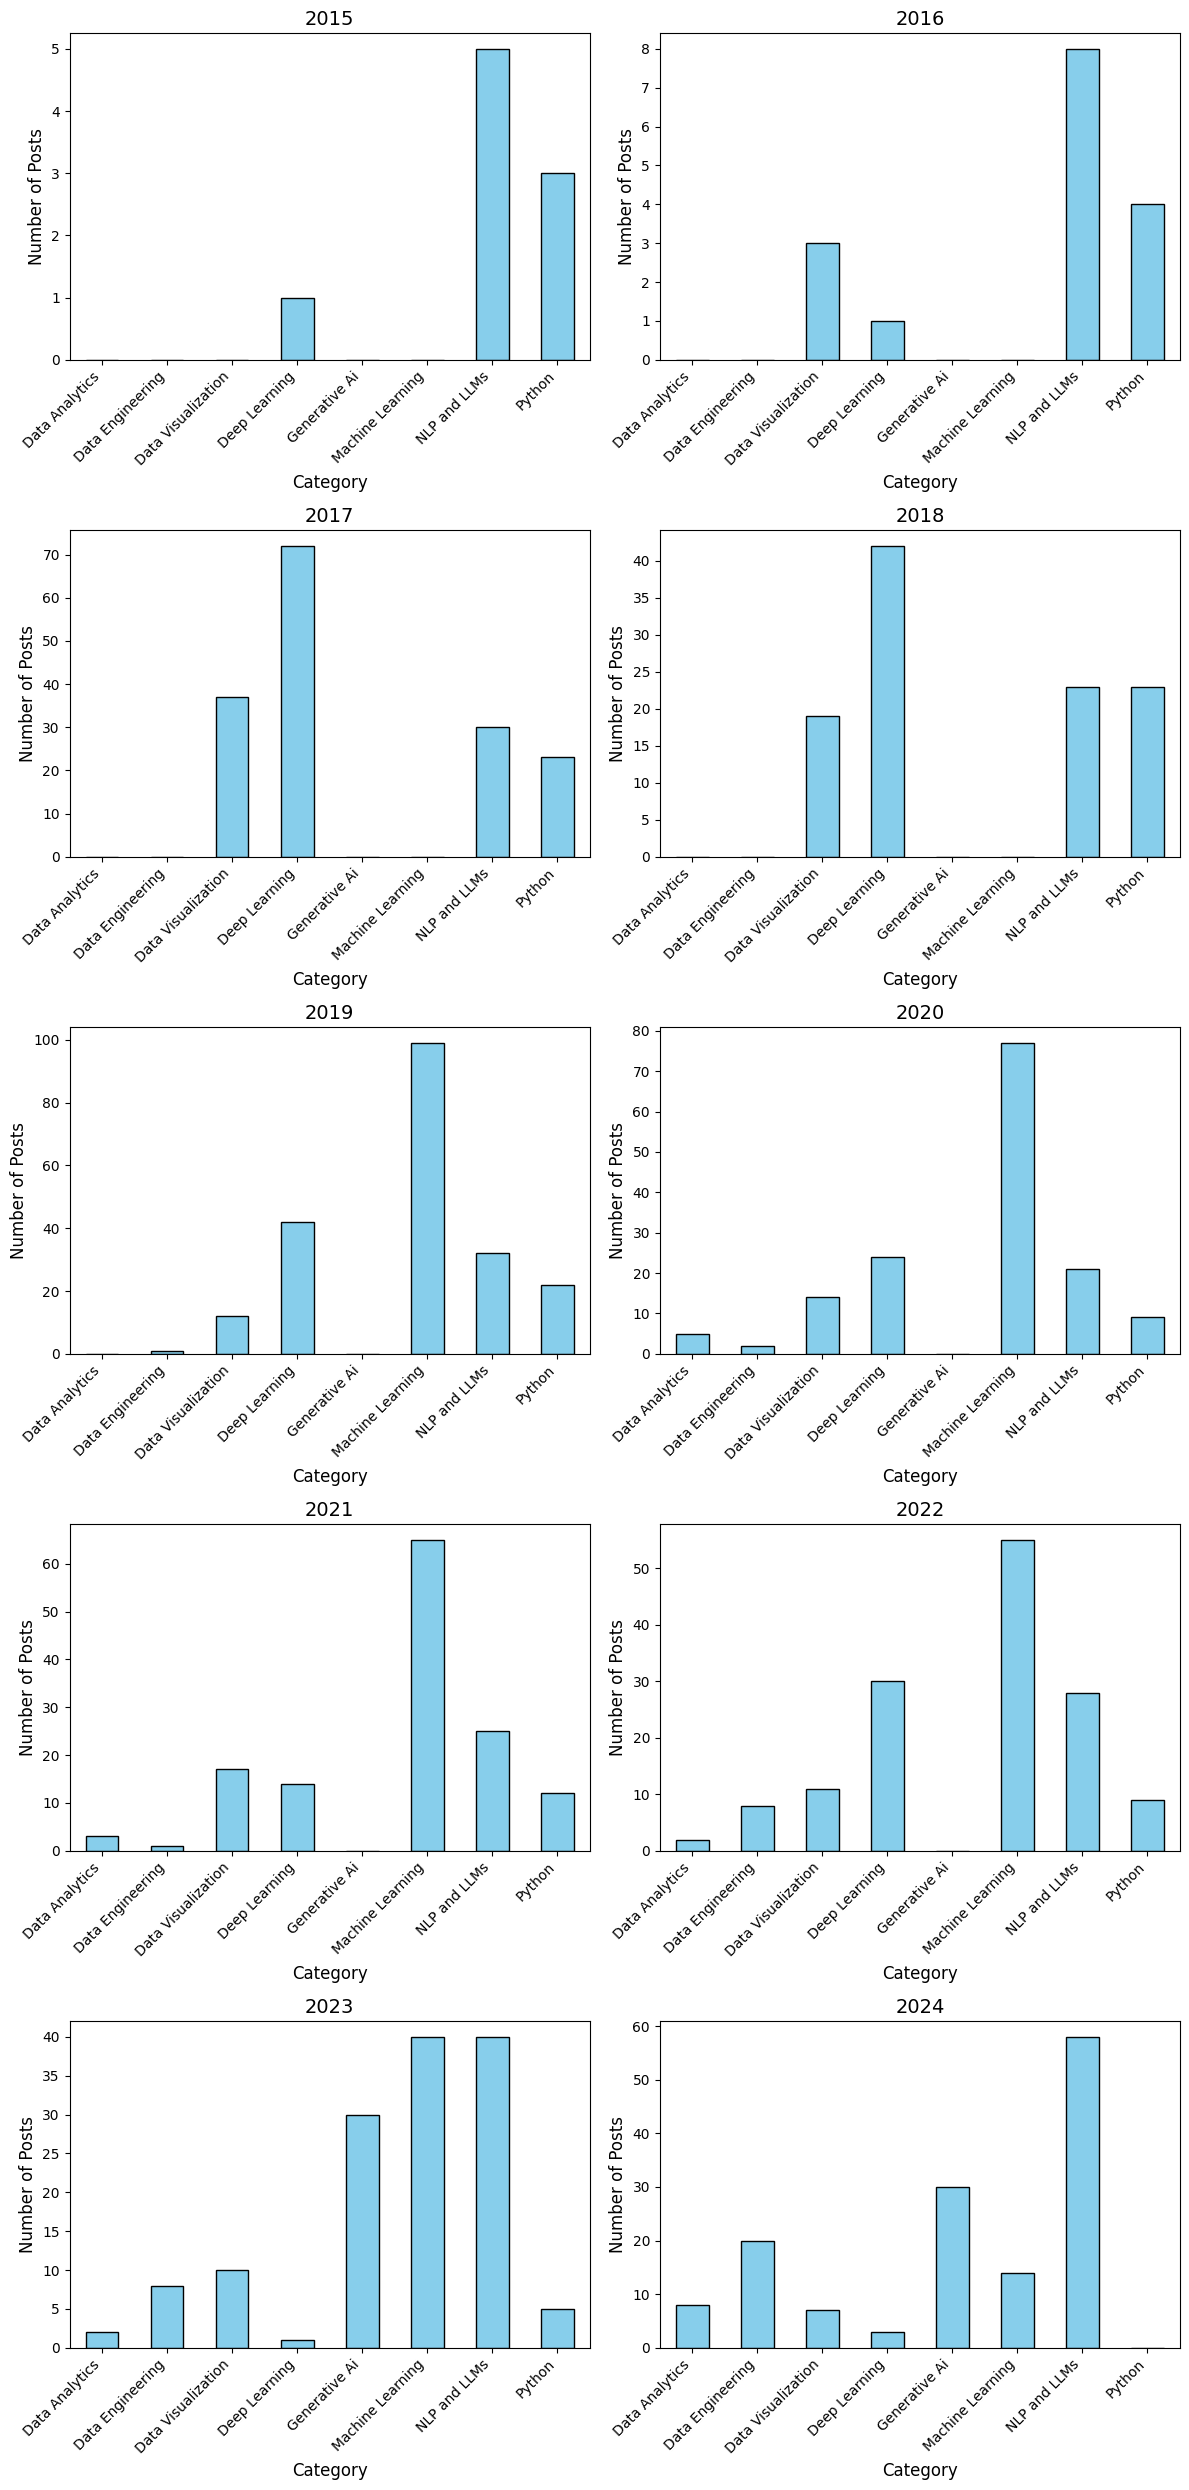

In [181]:
category_by_year = df_clean.groupby(['Year', 'Category']).size().unstack(fill_value=0)

years = category_by_year.index
num_years = len(years)

fig, axes = plt.subplots((num_years + 1) // 2, 2, figsize=(12, 5 * ((num_years + 1) // 2)))

if num_years == 1:
    axes = [axes]

for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]
    category_count = category_by_year.loc[year]
    category_count.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{year}', fontsize=14)
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Number of Posts', fontsize=12)
    ax.set_xticklabels(category_count.index, rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()